In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
#Define image size and batch size
IMG_SIZE=224
BATCH_SIZE=32

In [22]:
#creating training data parameters!
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [25]:
#creating training data with above parameters and applying transformation!
#folder=parameters.flow_from_directory(path,ts,bs,cm,subset)
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/brain_tumor_dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

Found 915 images belonging to 2 classes.


In [55]:
#creating validation data!
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

Found 227 images belonging to 2 classes.


In [56]:
#Define the model
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.5492 - loss: 0.9049 - val_accuracy: 0.6256 - val_loss: 0.6627
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6447 - loss: 0.6564 - val_accuracy: 0.7665 - val_loss: 0.6252
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.7346 - loss: 0.5981 - val_accuracy: 0.6123 - val_loss: 0.5800
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.7433 - loss: 0.4922 - val_accuracy: 0.8458 - val_loss: 0.3996
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8645 - loss: 0.3907 - val_accuracy: 0.9031 - val_loss: 0.2941


In [60]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/train/praveena.h5')

In [68]:
#Load your model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/brain_tumor_dataset/train/praveena.h5')
print("Model Loaded")

Model Loaded


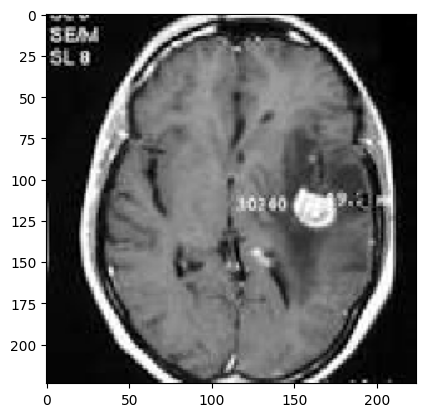

In [69]:
#load and view the test image
test_image_path="/content/drive/MyDrive/download.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [70]:
#preprocess the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255

In [71]:
#make predictions
predictions=model.predict(img_array)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[0.8743604]]


In [74]:
if (predictions>0.5):
  print("The person has brain tumor")
else:
  print("The person does not have brain tumor")

The person has brain tumor
